<a href="https://colab.research.google.com/github/debangana97/GRIP-Feb-21/blob/main/Exploratory_Data_Analysis_on_'SampleSuperstore'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name- Debangana Mallick**
### GRIP-Sparks Foundation
### Data Science and Business Analytics
### Task- Exploratory Data Analysis on SampleSuperstore

In [1]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data = data.drop(columns=['Postal Code'], axis=1)
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
data.describe(include=np.object)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no missing values in the data

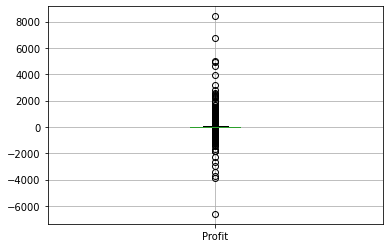

In [10]:
#Check for outliers
#Removing outliers
#Boxplot after outliers are removed
data.boxplot(column=['Profit'])
plt.show()

Many outliers are present in the data so now using the inter-quartile range and the outlier limit we will remove the outliers.

In [11]:
def remove_outlier(col):
  sorted(col)
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5*IQR)
  return lower_range, upper_range

In [12]:
low_profit, high_profit = remove_outlier(data['Profit'])
data['Profit']=np.where(data['Profit']<low_profit,low_profit, data['Profit'])
data['Profit']=np.where(data['Profit']>high_profit,high_profit, data['Profit'])

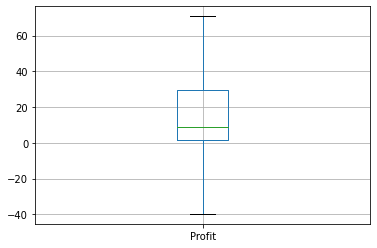

In [13]:
data.boxplot(column=['Profit'])
plt.show()

After removal of outliers, the boxplot gives a much clearer information about the Profit

In [14]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.280409
Quantity,0.200795,1.000000,0.008623,0.196820
Discount,-0.028190,0.008623,1.000000,-0.497494
Profit,0.280409,0.196820,-0.497494,1.000000


From the above correlation matrix, the only correlation that seems significant is the one between Discount and Profit. There is a trong negative correlation between the two variables.

**The higher the percentage of discount provided, the greater the loss faced by the superstore.** Hence, if the manager reduces the discount then he might improve the chance of getting more profit.

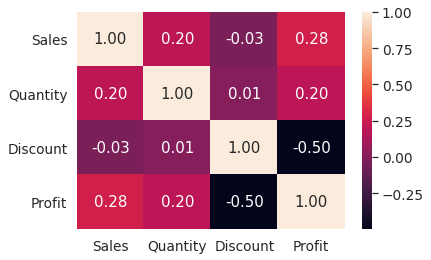

In [15]:
sns.set(font_scale=1.25)
sns.heatmap(data.corr(), annot= True, fmt='.2f')
plt.show()

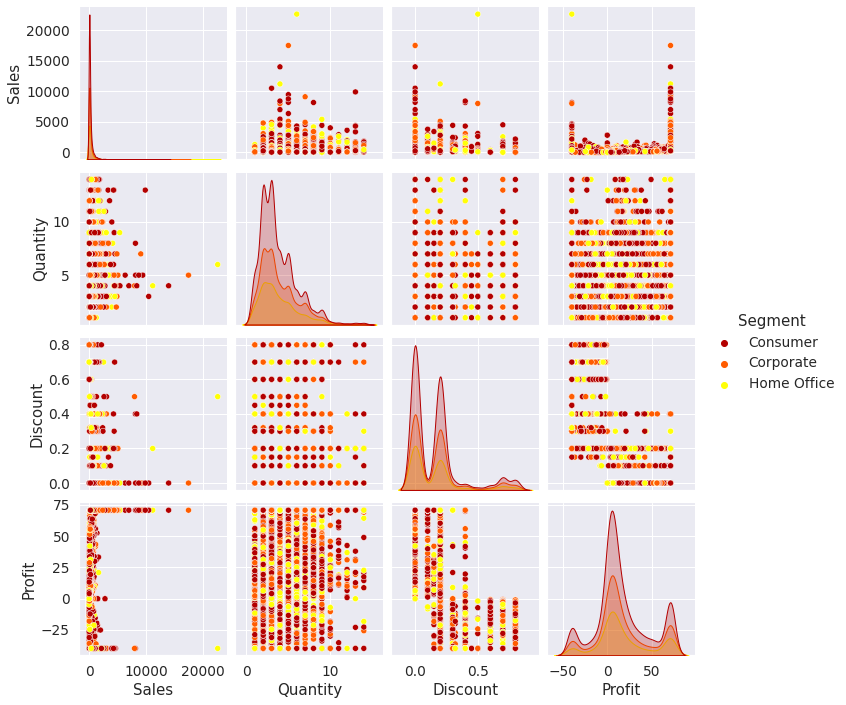

In [16]:
sns.pairplot(data, hue='Segment', palette='hot')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


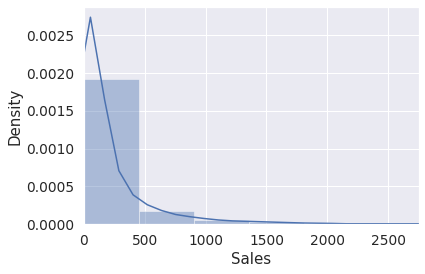

In [17]:
#Distribution plot of Sales
sales = sns.distplot(data['Sales'])
sales.set(xlim=(0, 2750))
plt.show()

In [18]:
print("Skewness: %f" % data['Sales'].skew())
print("Kurtosis: %f" % data['Sales'].kurt())

Skewness: 12.972752
Kurtosis: 305.311753


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


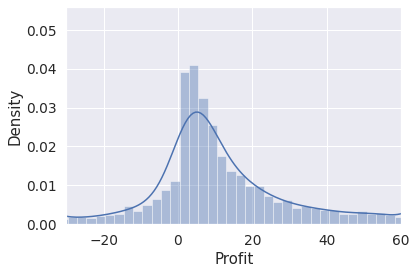

In [19]:
#Distribution plot of Profit
profit = sns.distplot(data['Profit'])
profit.set(xlim=(-30,60))
plt.show()

The distribution of Profit resembles a Normal distribution. 

In [20]:
print("Skewness: %f" % data['Profit'].skew())
print("Kurtosis: %f" % data['Profit'].kurt())

Skewness: 0.415481
Kurtosis: -0.207647


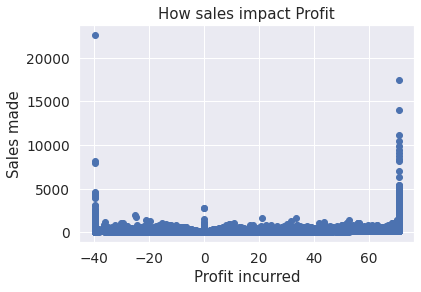

In [21]:
#Relation between Sales and Profit
plt.scatter(y='Sales', x='Profit', data=data)
plt.title('How sales impact Profit')
plt.xlabel('Profit incurred')
plt.ylabel('Sales made')
plt.show()

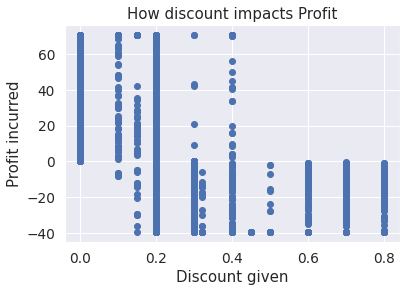

In [22]:
#Relation between Discount and Profit
plt.scatter(x='Discount', y='Profit', data=data)
plt.title('How discount impacts Profit')
plt.ylabel('Profit incurred')
plt.xlabel('Discount given')
plt.show()

There is a definite negative correlation between discount and profit. Greater the discount given, lesser the profit made.

In [23]:
df1 = data.groupby(['Ship Mode']).sum()
df1

,Sales,Quantity,Discount,Profit
Ship Mode,,,,
First Class,3.514284e+05,5693,253.17,24137.238150
Same Day,1.283631e+05,1960,82.75,9324.235250
Second Class,4.591936e+05,7423,270.15,34442.785400
Standard Class,1.358216e+06,22797,955.02,92679.468675


In total, Standard Class has experienced the most profit among the four modes

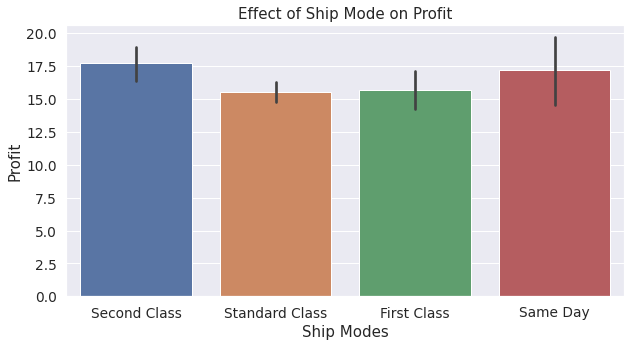

In [24]:
#Plotting Ship Mode and Profit
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Ship Mode', y='Profit', data=data)
plt.title('Effect of Ship Mode on Profit')
plt.xlabel('Ship Modes')
plt.ylabel('Profit')
plt.show()

Second Class has experienced the highest profit for a particular product.

In [25]:
df2 = data.groupby(['Region']).sum()
df2

,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,23358.169475
East,678781.2400,10618,414.00,43919.428400
South,391721.9050,6209,238.55,29797.785075
West,725457.8245,12266,350.20,63508.344525


West region served as the most profitable area selling over 12000 items

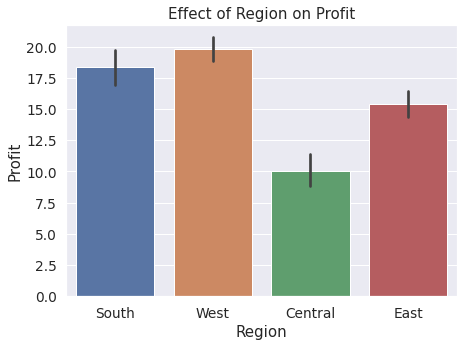

In [26]:
#Plotting Region and Profit
f, ax = plt.subplots(figsize=(7,5))
sns.barplot(x='Region', y='Profit', data=data)
plt.title('Effect of Region on Profit')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

The West Regions seem to experience a greater profit than the other regions.

In [27]:
df3 = data.groupby(['Category']).sum()
df3

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,741999.7953,8028,368.89,24321.387425
Office Supplies,719047.0320,22906,947.80,81562.112275
Technology,836154.0330,6939,244.40,54700.227775


Selling Office Supplies has resulted in the most profit. The store has sold almost 23000 products of Office Supplies

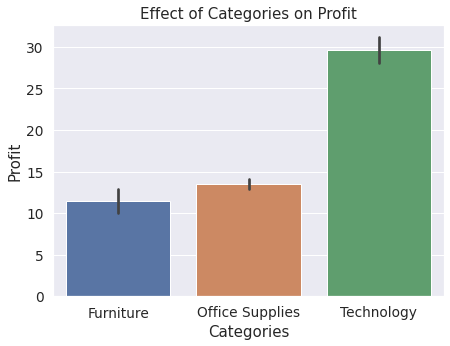

In [28]:
#Plotting Category and Profit
f, ax = plt.subplots(figsize=(7,5))
sns.barplot(x='Category', y='Profit', data=data)
plt.title('Effect of Categories on Profit')
plt.xlabel('Categories')
plt.ylabel('Profit')
plt.show()

Clearly, Technology serves as the best option in case of getting the highest profit. For this store, the greatest profit gained has come from selling Technology products

In [29]:
df4 = data.groupby(['Sub-Category']).sum()
df4

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,167380.3180,2976,60.80,22357.133900
Appliances,107532.1610,1729,77.60,11141.299475
Art,27118.7920,3000,59.60,6349.089475
Binders,203412.7330,5974,567.00,11371.355975
Bookcases,114879.9963,868,48.14,1378.888850
Chairs,328449.1030,2356,105.00,11164.519775
Copiers,149528.0300,234,11.00,4781.452625
Envelopes,16476.4020,906,20.40,5799.756400
Fasteners,3024.2800,914,17.80,949.518200


Paper has been the key product in gaining the maximum profit while Tables has been the key product in suffering the maximum loss.

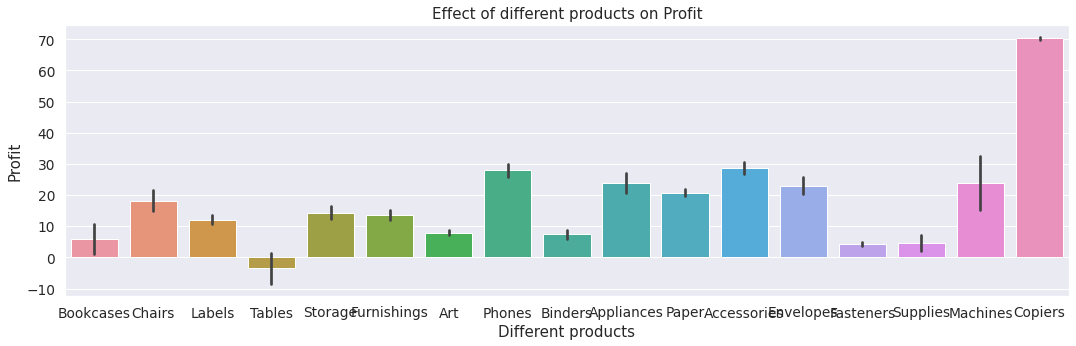

In [30]:
#Plotting Subcategories and Profit
f, ax = plt.subplots(figsize=(18,5))
sns.barplot(x='Sub-Category', y='Profit', data=data)
plt.title('Effect of different products on Profit')
plt.xlabel('Different products')
plt.ylabel('Profit')
plt.show()

Selling a copier helped the store gain the most profit whereas selling tables faced a great amount of loss. The store manager needs to work on the selling of tables because discount given was quite less still there was huge amount of loss

In [31]:
df5 = data.groupby(['Segment']).sum()
df5

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.161401e+06,19521,820.91,80536.723350
Corporate,7.061464e+05,11608,477.85,49340.459625
Home Office,4.296531e+05,6744,262.33,30706.544500


Consumer products were sold the most implying that consumers have bought mostly from the Superstore and also were given the maximum discounts and hence the profit incurred was also the highest.

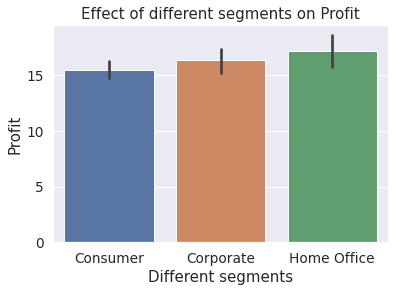

In [32]:
#Plotting Segments and Profit
sns.barplot(x='Segment', y='Profit', data=data)
plt.title('Effect of different segments on Profit')
plt.xlabel('Different segments')
plt.ylabel('Profit')
plt.show()

A particular Home Office products experienced the greatest profit.

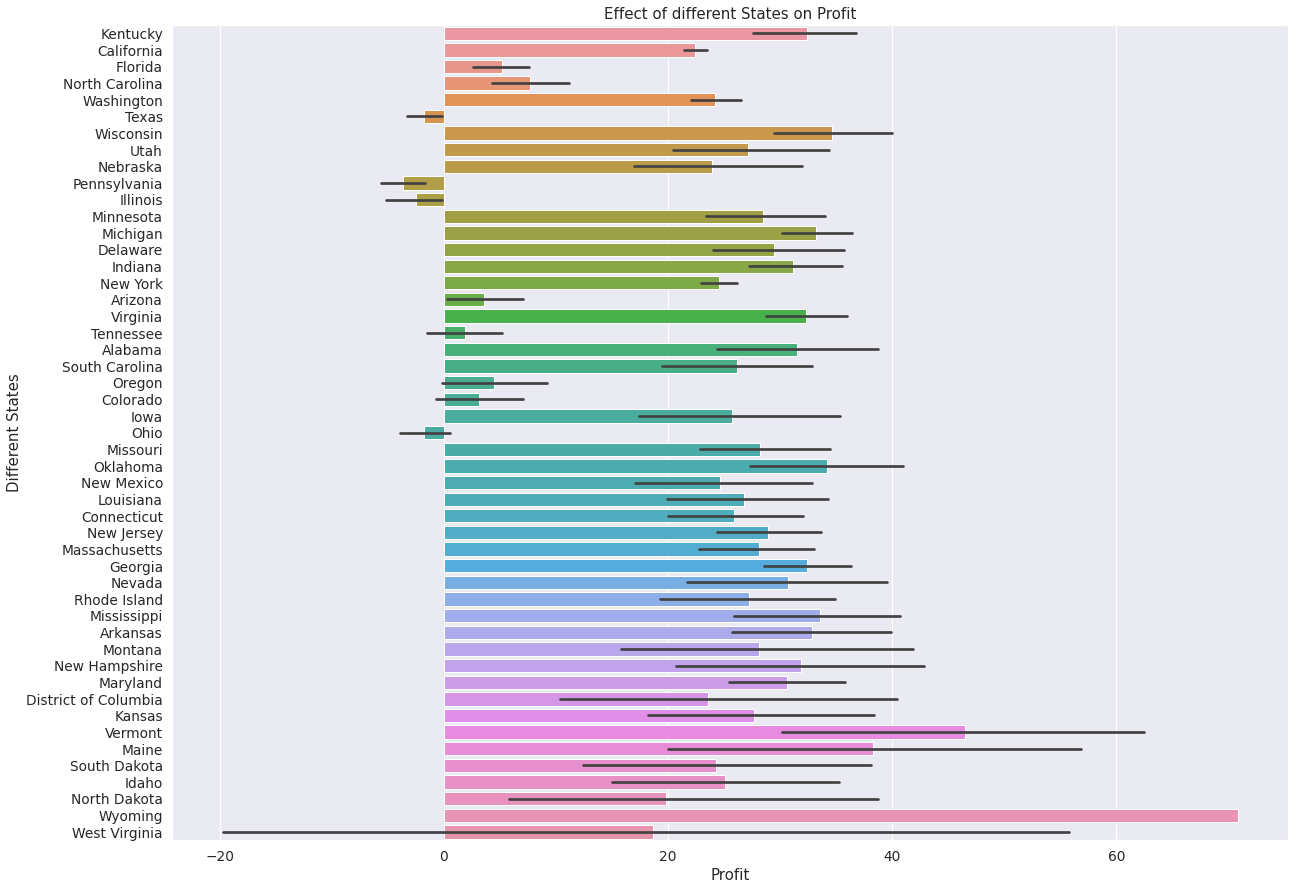

In [38]:
#Plotting State and Profit
plt.subplots(figsize=(20,15))
sns.barplot(y='State', x='Profit', data=data)
plt.title('Effect of different States on Profit')
plt.ylabel('Different States')
plt.xlabel('Profit')
plt.show()

Texas, Pennsylvania, Illinois and Ohio have not gained any profit while Wyoming is the most profitable State.

### **Encoding the Categorical variables**

In [39]:
data1 = data.copy()
data1.tail(10)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9984,Standard Class,Consumer,United States,Long Beach,New York,East,Office Supplies,Labels,31.500,10,0.0,15.120000
9985,Standard Class,Consumer,United States,Long Beach,New York,East,Office Supplies,Supplies,55.600,4,0.0,16.124000
9986,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Accessories,36.240,1,0.0,15.220800
9987,Standard Class,Corporate,United States,Athens,Georgia,South,Technology,Accessories,79.990,1,0.0,28.796400
9988,Standard Class,Corporate,United States,Athens,Georgia,South,Technology,Phones,206.100,5,0.0,55.647000
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.102800
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.633200
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.393200
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.320000
9993,Second Class,Consumer,United States,Westminster,California,West,Office Supplies,Appliances,243.160,2,0.0,70.816875


In [40]:
#Encoding the categorical variables
dummies = pd.get_dummies(data[['Ship Mode', 'Segment', 'Region', 'Category']], columns=['Ship Mode', 'Segment', 'Region', 'Category'], prefix=['shipmode', 'segment', 'regions', 'category'], drop_first=True).head()
dummies.head()

,shipmode_Same Day,shipmode_Second Class,shipmode_Standard Class,segment_Corporate,segment_Home Office,regions_East,regions_South,regions_West,category_Office Supplies,category_Technology
0,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0
2,0,1,0,1,0,0,0,1,1,0
3,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,1,0,1,0


In [41]:
columns=['Ship Mode', 'Segment', 'Region', 'Category']
data1 = pd.concat([data1, dummies], axis=1)
#dropping original columns
data1.drop(columns, axis=1, inplace=True)
data1.head()

,Country,City,State,Sub-Category,Sales,Quantity,Discount,Profit,shipmode_Same Day,shipmode_Second Class,shipmode_Standard Class,segment_Corporate,segment_Home Office,regions_East,regions_South,regions_West,category_Office Supplies,category_Technology
0,United States,Henderson,Kentucky,Bookcases,261.9600,2,0.00,41.913600,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,United States,Henderson,Kentucky,Chairs,731.9400,3,0.00,70.816875,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,United States,Los Angeles,California,Labels,14.6200,2,0.00,6.871400,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,United States,Fort Lauderdale,Florida,Tables,957.5775,5,0.45,-39.724125,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,United States,Fort Lauderdale,Florida,Storage,22.3680,2,0.20,2.516400,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### **Possible Business strategies-**

1. The sale of Tables must be improved as it faces the maximum loss

2. Standard Class seems to be the best choice as Ship mode

3. Technology was sold less but helped in gaining the maximum profit

4. Consumer products and Home Office goods should be sold more